<a href="https://colab.research.google.com/github/Sandra877/CryptographyICS2411Labs/blob/main/Copy_of_SWKTrafficAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import precision_recall_curve  # For Precision-Recall curve
from sklearn.preprocessing import label_binarize
import numpy as np  # For numerical operations
import matplotlib.colors as mcolors  # For coloring heatmaps

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TRAFFIC ACCIDENTS DATA.csv to TRAFFIC ACCIDENTS DATA.csv


In [ ]:
# Load the data
file_path = 'TRAFFIC ACCIDENTS DATA.csv'
data = pd.read_csv(file_path)

In [ ]:
#display the first few rows
data.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,08/08/2023,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,07/08/2023,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,25/07/2023,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,02/12/2022,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,01/12/2022,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


In [ ]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          80 non-null     object
 1   Accident Spot                 81 non-null     object
 2   Area                          81 non-null     object
 3   County                        81 non-null     object
 4   Road/ Highway                 80 non-null     object
 5   Brief Accident Details/Cause  79 non-null     object
 6   Victims                       63 non-null     object
 7   Total people confirmed dead   72 non-null     object
 8   Time of the Accidents         25 non-null     object
 9   Weather conditions            1 non-null      object
dtypes: object(10)
memory usage: 6.5+ KB
None


data cleaning

In [ ]:
data.isnull().sum()

,0
Date,1
Accident Spot,0
Area,0
County,0
Road/ Highway,1
Brief Accident Details/Cause,2
Victims,18
Total people confirmed dead,9
Time of the Accidents,56
Weather conditions,80


In [ ]:
#Drop unnecessary columns
data.drop(columns=['Date', 'Weather conditions', 'Time of the Accidents'], inplace=True)

In [ ]:
#Drop rows with missing values
data = data.dropna(subset=['Road/ Highway'])


In [ ]:
#Handle missing values by replacing them with 'Unknown'
data['Brief Accident Details/Cause'].fillna('Unknown', inplace=True)
data['Victims'].fillna('Unknown', inplace=True)

<ipython-input-9-1b1d8ef28c7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Brief Accident Details/Cause'].fillna('Unknown', inplace=True)
<ipython-input-9-1b1d8ef28c7d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# Fill missing 'Total people confirmed dead' with 0
data['Total people confirmed dead'].fillna(0, inplace=True)

<ipython-input-10-dedfb4baaaee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total people confirmed dead'].fillna(0, inplace=True)


In [ ]:
# Display cleaned data
print("\nCleaned Dataset Info:")
print(data.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 80
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Accident Spot                 80 non-null     object
 1   Area                          80 non-null     object
 2   County                        80 non-null     object
 3   Road/ Highway                 80 non-null     object
 4   Brief Accident Details/Cause  80 non-null     object
 5   Victims                       80 non-null     object
 6   Total people confirmed dead   80 non-null     object
dtypes: object(7)
memory usage: 5.0+ KB
None


In [ ]:
data.isnull().sum()

,0
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,0
Victims,0
Total people confirmed dead,0


In [ ]:
data.head()

,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1


In [ ]:
#Convert 'Total people confirmed dead' to numeric
data['Total people confirmed dead'] = pd.to_numeric(data['Total people confirmed dead'], errors='coerce').fillna(0).astype(int)

VICTIMS

High Risk Categoties (1):
- Driver and passengers
- Passengers and pedestrians
- Occupants of the small vehicle
- Drivers/Occupants

Low Risk (0):
- Pedestrian
- Passenger
- Motorist


HIGH-RISK CAUSES (ROAD-RELATED) (1)

- Lost control
- Head on collision
- Overturn
- Rolled
- Brakes failed
- Swerved
- Collided
- Rammed

FATALITIES CLASSIFICATION

- High Fatalities (1) if there are more than 2 fatalities in the accident.
- Low Fatalities (0) if there are 2 or fewer fatalities.


CLASSIFICATION PROCESS

Dangerous Accident:
   - Class 2 (Dangerous): If the accident has all 3 categoried as (1)
   - Class 1 (Moderate Risk): If the accident has 2 of the 3 factors
   - Class 0 (Low Risk): If the accident has 0 or 1 factor


In [ ]:
# Define the list of high-risk categories for victims
high_risk_categories = [
    "Driver and passengers", "Passengers and pedestrians", "Occupants of the small vehicle",
    "Drivers/Occupants", "Drivers,Passengers and pedestrians", "Passengers and drivers",
    "Passenger and driver", "Drivers and passengers", "Driver and other motorists",
    "Rider", "Motorist"
]

# Define the list of high-risk accident causes
high_risk_causes = [
    "lost control", "head on collision", "overturn", "rolled", "brakes failed",
    "swerved", "collided", "rammed"
]

# Create additional features based on existing columns

# Classify based on fatalities (more than 2 fatalities)
data['High Fatalities'] = (data['Total people confirmed dead'] > 2).astype(int)

# Handle NaN values in 'Brief Accident Details/Cause' column by filling with 'Unknown'
data['Brief Accident Details/Cause'] = data['Brief Accident Details/Cause'].fillna('Unknown')

# Classify based on cause (focus on high-risk causes)
data['High Risk Cause'] = data['Brief Accident Details/Cause'].apply(lambda x: 1 if
    any(cause in str(x).lower() for cause in high_risk_causes) else 0)

# Map 'Victims' to a binary classification (High Risk Accident)
data['High Risk Accident'] = data['Victims'].apply(lambda x: 1 if x in high_risk_categories else 0)

# Classification for Dangerous Accident
data['Dangerous Accident'] = data.apply(
    lambda row: 2 if row['High Fatalities'] == 1 and row['High Risk Cause'] == 1 and row['High Risk Accident'] == 1 else
               (1 if sum([row['High Fatalities'], row['High Risk Cause'], row['High Risk Accident']]) == 2 else 0), axis=1)

# Check the distribution of the new classification
print(data['Dangerous Accident'].value_counts())


Dangerous Accident
0    41
1    34
2     5
Name: count, dtype: int64


In [ ]:
#Encode categorical features
categorical_cols = ['Road/ Highway', 'Brief Accident Details/Cause', 'Victims', 'County', 'Area', 'Accident Spot']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Dangerous Accident', 'Total people confirmed dead'])
y = data['Dangerous Accident']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Output the accuracies and classification reports
print(f"\nDecision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 100.00%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [ ]:
#Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Make predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

evaluation

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy Score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Precision Score (using 'weighted' average for multiclass)
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))

# Recall Score (using 'weighted' average for multiclass)
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))

# F1 Score (using 'weighted' average for multiclass)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))



Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.91      0.91        11
           2       0.00      0.00      0.00         1

    accuracy                           0.92        24
   macro avg       0.61      0.64      0.62        24
weighted avg       0.88      0.92      0.90        24


Confusion Matrix:
[[12  0  0]
 [ 1 10  0]
 [ 0  1  0]]

Accuracy Score: 0.9166666666666666
Precision Score: 0.8782051282051282
Recall Score: 0.9166666666666666
F1 Score: 0.8966666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

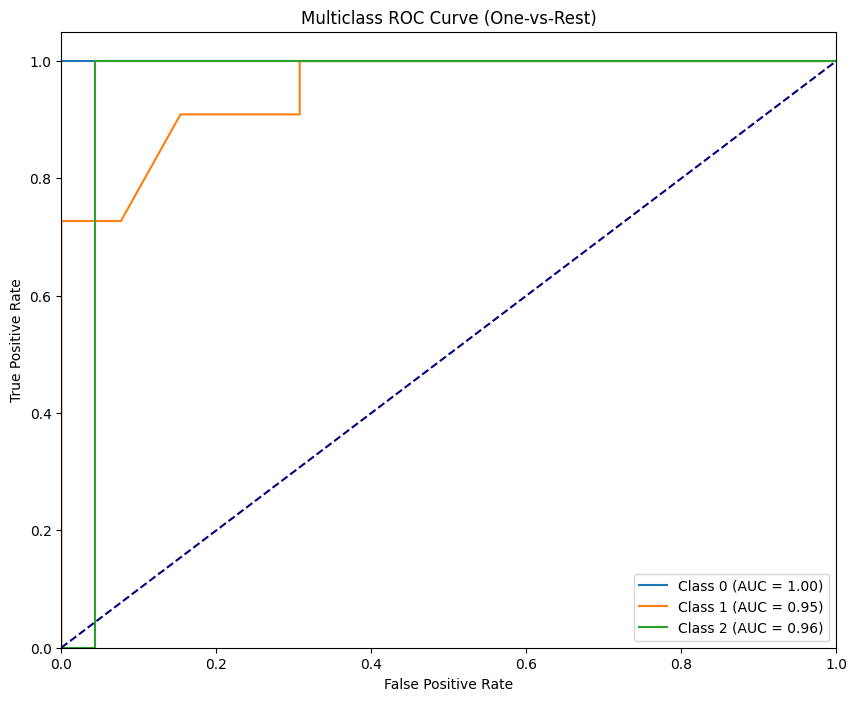

In [ ]:
#ROC Curve
# Binarize the output labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])  # Update classes as per your classes

# Get predicted probabilities
y_proba = rf_model.predict_proba(X_test)  # Make sure rf_model is the trained model

# Initialize a plot
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(3):  # Iterate over each class
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])  # ROC curve for each class
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")  # Plot curve with AUC

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line (chance level)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')

# Show the plot
plt.show()


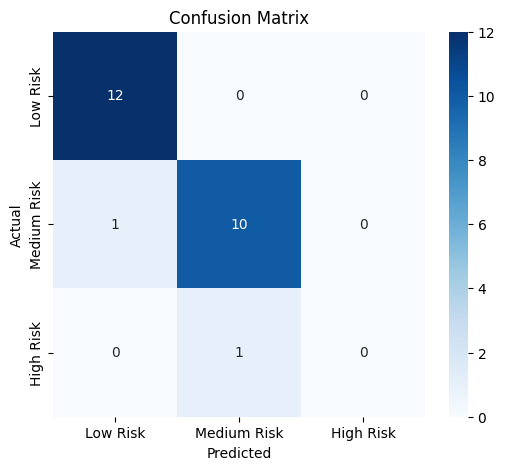

In [ ]:
# Generate confusion matrix for 3 classes
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "Medium Risk", "High Risk"], yticklabels=["Low Risk", "Medium Risk", "High Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
